In [28]:
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np
from configs.RecursiveVPSDE.Markovian_fQuadSinHF.recursive_Markovian_PostMeanScore_fQuadSinHF2_LowFTh_T256_H05_tl_110data_StbleTgt import get_config
from configs.RecursiveVPSDE.Markovian_fSinLog.recursive_Markovian_PostMeanScore_fSinLog_LowFTh_T256_H05_tl_110data_StbleTgt import get_config
from configs.RecursiveVPSDE.Markovian_fBiPot.recursive_Markovian_PostMeanScore_fBiPot_LowFTh_T256_H05_tl_110data_StbleTgt import get_config

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [29]:
from IPython.core.magic import register_cell_magic

@register_cell_magic
def skip(line, cell):
    return

In [30]:
config = get_config()
root_dir ="/Users/marcos/Library/CloudStorage/OneDrive-ImperialCollegeLondon/StatML_CDT/Year2/DiffusionModels/"
hermite_dir = root_dir + "ExperimentResults/Ridge/"
if "SinLog" in config.data_path:
    diradd = "SinLog"
elif "QuadSin" in config.data_path:
    diradd = "QuadSinHF"
elif "BiPot" in config.data_path:
    diradd = "BiPot"
if config.diffusion == 0.1:
        diradd+= "LowNoise"
elif config.diffusion == 10.:
    diradd += "HighNoise"
hermite_dir += diradd+"LessData/"
print(hermite_dir)

/Users/marcos/Library/CloudStorage/OneDrive-ImperialCollegeLondon/StatML_CDT/Year2/DiffusionModels/ExperimentResults/Ridge/BiPot/


In [31]:
for f in os.listdir(hermite_dir):
    assert "1024NPath" not in f
    if "T_MSEs" in f:
        print(hermite_dir+f)
        mse = pd.read_parquet(hermite_dir+f, engine="fastparquet")

/Users/marcos/Library/CloudStorage/OneDrive-ImperialCollegeLondon/StatML_CDT/Year2/DiffusionModels/ExperimentResults/Ridge/BiPot/Ridge_fBiPot_DriftEvalExp_10240NPaths_3906e-03dT_MSEs.parquet


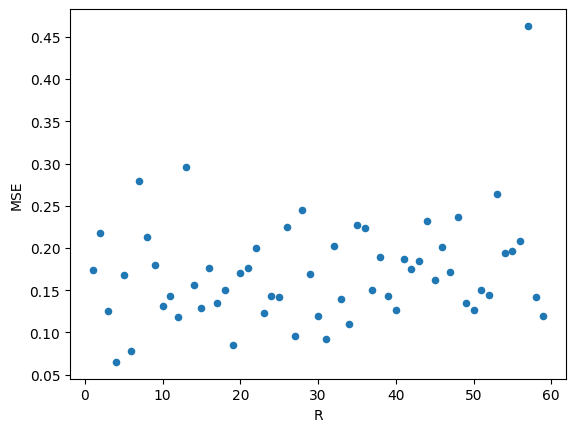

In [32]:
mse.reset_index(drop=False).plot(kind="scatter", x="index", y="0")
plt.xlabel("R")
plt.ylabel("MSE")
plt.show()
plt.close()

In [33]:
print(mse)
R = mse.dropna().iloc[np.argmin(mse.dropna().values.flatten())]
print("\n")
print(R)

              0
index          
1      0.174394
2      0.217636
3      0.125344
4      0.064974
5      0.168348
6      0.077639
7      0.279251
8      0.212868
9      0.179372
10     0.130640
11     0.142882
12     0.118542
13     0.295707
14     0.156005
15     0.128853
16     0.176687
17     0.135282
18     0.150002
19     0.085178
20     0.170374
21     0.175735
22     0.199456
23     0.123054
24     0.143499
25     0.141763
26     0.224863
27     0.095808
28     0.245410
29     0.169193
30     0.119658
31     0.092439
32     0.201740
33     0.140003
34     0.110300
35     0.227076
36     0.223896
37     0.150166
38     0.189562
39     0.142640
40     0.127063
41     0.186882
42     0.174972
43     0.184277
44     0.232139
45     0.161790
46     0.201008
47     0.172039
48     0.236516
49     0.134716
50     0.126996
51     0.150420
52     0.144373
53     0.263419
54     0.194068
55     0.196027
56     0.208758
57     0.463008
58     0.141833
59     0.119227


0    0.064974
Name: 4,

In [34]:
try:
    R = R.name
except AttributeError:
    pass
num_paths = 1024
save_path = hermite_dir + f"Ridge_f{diradd.replace('LessData', '')}_DriftEvalExp_{num_paths}NPaths_{config.deltaT:.3e}dT".replace(".", "")
all_hermite_drifts = np.load(save_path + f"_{R}_drift_est.npy")
all_true_drifts=np.load(save_path + f"_{R}_true_drift.npy", allow_pickle=True)
all_true_paths = np.load(save_path + f"_{R}_true_paths.npy", allow_pickle=True)

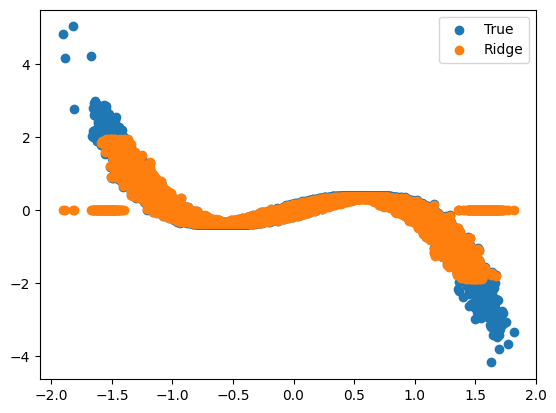

In [35]:
plt.scatter(all_true_paths.flatten(), all_true_drifts.flatten(), label="True")
plt.scatter(all_true_paths.flatten(), all_hermite_drifts.flatten(), label="Ridge")
plt.legend()
plt.show()